In [1]:
import numpy as np
import pandas as pd
import scipy.signal as signal
import scipy.stats as stats
from mne.filter import resample
from expyfun.io import read_wav, write_hdf5, read_hdf5
# from mtrf.model import TRF, load_sample_data
#from mtrf.stats import cross_validate
from statsmodels.stats import multitest
import mne
import pickle
import matplotlib.pyplot as plt
import os

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin
from scipy.stats import pearsonr

In [3]:
subject_list = ['chimera_001','chimera_002', 'chimera_003','chimera_004',
                'chimera_005','chimera_006','chimera_007','chimera_008',
                'chimera_009','chimera_010','chimera_011',
                'chimera_013','chimera_014','chimera_015','chimera_016',
                'chimera_017','chimera_018','chimera_019','chimera_020',
                'chimera_021','chimera_022','chimera_023','chimera_024',
                'chimera_025','chimera_pilot_1_64chn','chimera_pilot_2_64chn']

In [4]:
exp_path = '/Volumes/TOSHIBA EXT/Chimera/'

In [15]:
df = pd.read_csv(exp_path+'expectation_effect_ltm_stm_both_nb_pitch_ioi_linear_model_zscore_reg_individual_pitch-time.csv')
df["random_eff"] = df["subject"].astype(str) + "+" + df["group"].astype(int).astype(str)

In [16]:
subject_group = df.groupby(['subject','category','model','musician'])
mean_subject_group = subject_group.mean(numeric_only=True).reset_index()
mean_ori_A_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'original') & (mean_subject_group['model'] == 'A')]['r'])
mean_ori_both_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'original') & (mean_subject_group['model'] == 'both')]['r'])
mean_ori_both_pitch_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'original') & (mean_subject_group['model'] == 'both_pitch')]['r'])
mean_ori_both_time_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'original') & (mean_subject_group['model'] == 'both_time')]['r'])

mean_chimera_A_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'chimera') & (mean_subject_group['model'] == 'A')]['r'])
mean_chimera_both_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'chimera') & (mean_subject_group['model'] == 'both')]['r'])
mean_chimera_both_pitch_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'chimera') & (mean_subject_group['model'] == 'both_pitch')]['r'])
mean_chimera_both_time_sub = np.array(mean_subject_group[(mean_subject_group['category'] == 'chimera') & (mean_subject_group['model'] == 'both_time')]['r'])


In [ ]:
set_group = df.groupby(['random_eff','category','model','musician'])
mean_set_group = set_group.mean().reset_index()
mean_ori_A_group = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'A')]['random_eff'])
mean_ori_A_musician = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'A')]['musician'])
mean_chimera_A_group = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'A')]['random_eff'])
mean_chimera_A_musician = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'A')]['musician'])


mean_ori_A = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'A')]['r'])
mean_ori_both = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'both')]['r'])
mean_ori_both_pitch = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'both_pitch')]['r'])
mean_ori_both_time = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'both_time')]['r'])

mean_chimera_A = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'A')]['r'])
mean_chimera_both = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'both')]['r'])
mean_chimera_both_pitch = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'both_pitch')]['r'])
mean_chimera_both_time = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'both_time')]['r'])


In [ ]:
delta_r_df = pd.read_csv(exp_path+'expectation_effect_ltm_stm_nb_pitch_ioi_linear_model_zscore_reg_individual_delta_r_pitch-time.csv')

In [9]:
formula = "delta_r ~ C(category,Treatment(reference='original')) + C(model,Treatment(reference='both')) + C(category, Treatment(reference='original'))*C(model,Treatment(reference='both')) + musician + musician*C(category, Treatment(reference='original'))"
delta_r_lm = smf.mixedlm(formula, delta_r_df, groups="random_eff").fit()
print(delta_r_lm.summary())

                                                        Mixed Linear Model Regression Results
Model:                                            MixedLM                                Dependent Variable:                                delta_r   
No. Observations:                                 5148                                   Method:                                            REML      
No. Groups:                                       858                                    Scale:                                             0.0000    
Min. group size:                                  6                                      Log-Likelihood:                                    18907.6777
Max. group size:                                  6                                      Converged:                                         Yes       
Mean group size:                                  6.0                                                                                                 


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [12]:
# show the delta_r data
delta_r_df
# sort the delta_r data by delta_r
delta_r_df = delta_r_df.sort_values(by='delta_r', ascending=False)
# show the top 2 subjects
delta_r_df.head(2)


,Unnamed: 0,model,category,delta_r,random_eff,musician,subject
814,814,both,original,0.034247,8+29,2.0,8
2718,144,both,chimera,0.033199,12+2,7.0,12


In [20]:
# post-hoc
pairwise_delta_r = pingouin.pairwise_ttests(data=delta_r_df, dv="delta_r", subject="subject", within=["model","category"], parametric=True, alpha=0.05, padjust='holm', nan_policy='pairwise')
print(pairwise_delta_r.round(3))
pairwise_delta_r.columns
pairwise_arr_delta_r = np.array(pairwise_delta_r)

delta_r_subject_group = delta_r_df.groupby(['subject','category','model'])
delta_r_mean_subject_group = delta_r_subject_group.mean(numeric_only=True).reset_index()

mean_ori_both_subject = np.array(delta_r_mean_subject_group[(delta_r_mean_subject_group['category'] == 'original') & (delta_r_mean_subject_group['model'] == 'both')]['delta_r'])
mean_ori_both_pitch_subject = np.array(delta_r_mean_subject_group[(delta_r_mean_subject_group['category'] == 'original') & (delta_r_mean_subject_group['model'] == 'both_pitch')]['delta_r'])
mean_ori_both_time_subject = np.array(delta_r_mean_subject_group[(delta_r_mean_subject_group['category'] == 'original') & (delta_r_mean_subject_group['model'] == 'both_time')]['delta_r'])

mean_chimera_both_subject = np.array(delta_r_mean_subject_group[(delta_r_mean_subject_group['category'] == 'chimera') & (delta_r_mean_subject_group['model'] == 'both')]['delta_r'])
mean_chimera_both_pitch_subject = np.array(delta_r_mean_subject_group[(delta_r_mean_subject_group['category'] == 'chimera') & (delta_r_mean_subject_group['model'] == 'both_pitch')]['delta_r'])
mean_chimera_both_time_subject = np.array(delta_r_mean_subject_group[(delta_r_mean_subject_group['category'] == 'chimera') & (delta_r_mean_subject_group['model'] == 'both_time')]['delta_r'])


delta_r_set_group = delta_r_df.groupby(['random_eff','category','model','musician'])
delta_r_mean_set_group = delta_r_set_group.mean(numeric_only=True).reset_index()
mean_ori_both = np.array(delta_r_mean_set_group[(delta_r_mean_set_group['category'] == 'original') & (delta_r_mean_set_group['model'] == 'both')]['delta_r'])
mean_ori_both_pitch = np.array(delta_r_mean_set_group[(delta_r_mean_set_group['category'] == 'original') & (delta_r_mean_set_group['model'] == 'both_pitch')]['delta_r'])
mean_ori_both_time = np.array(delta_r_mean_set_group[(delta_r_mean_set_group['category'] == 'original') & (delta_r_mean_set_group['model'] == 'both_time')]['delta_r'])

mean_chimera_both = np.array(delta_r_mean_set_group[(delta_r_mean_set_group['category'] == 'chimera') & (delta_r_mean_set_group['model'] == 'both')]['delta_r'])
mean_chimera_both_pitch = np.array(delta_r_mean_set_group[(delta_r_mean_set_group['category'] == 'chimera') & (delta_r_mean_set_group['model'] == 'both_pitch')]['delta_r'])
mean_chimera_both_time = np.array(delta_r_mean_set_group[(delta_r_mean_set_group['category'] == 'chimera') & (delta_r_mean_set_group['model'] == 'both_time')]['delta_r'])


/opt/anaconda3/lib/python3.12/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


           Contrast       model           A           B Paired Parametric  \
0             model           -        both  both_pitch   True       True   
1             model           -        both   both_time   True       True   
2             model           -  both_pitch   both_time   True       True   
3          category           -     chimera    original   True       True   
4  model * category        both     chimera    original   True       True   
5  model * category  both_pitch     chimera    original   True       True   
6  model * category   both_time     chimera    original   True       True   

       T   dof alternative  p-unc  p-corr p-adjust       BF10  hedges  
0  7.889  25.0   two-sided  0.000   0.000     holm  4.589e+05   1.214  
1  5.894  25.0   two-sided  0.000   0.000     holm    5256.57   0.753  
2 -2.633  25.0   two-sided  0.014   0.014     holm      3.494  -0.472  
3 -3.490  25.0   two-sided  0.002     NaN      NaN     20.447  -0.671  
4 -3.490  25.0   two-si

In [24]:
# find the two subjects that have the highest mean_ori_both_subject
# Get indices sorted by mean_ori_both_subject values in descending order
sorted_indices = np.argsort(mean_ori_both_subject)[::-1]

# Get the two subjects with highest values
highest_two_indices = sorted_indices[:2]
highest_two_subjects = [subject_list[i] for i in highest_two_indices]
highest_two_values = [mean_ori_both_subject[i] for i in highest_two_indices]

print("Two subjects with highest mean_ori_both_subject:")
print("=" * 50)
for i, (subject_name, value) in enumerate(zip(highest_two_subjects, highest_two_values), 1):
    print(f"{i}. {subject_name}: {value:.6f}")

print(f"\nSubject list index mapping:")
for i, (subject_name, index) in enumerate(zip(highest_two_subjects, highest_two_indices), 1):
    print(f"{i}. {subject_name} (index {index})")

Two subjects with highest mean_ori_both_subject:
1. chimera_003: 0.008704
2. chimera_015: 0.007338

Subject list index mapping:
1. chimera_003 (index 2)
2. chimera_015 (index 13)


In [25]:
# do the post-hoc test excluding the two subjects
delta_r_df_exclude_two_subjects = delta_r_df[~delta_r_df['subject'].isin(highest_two_subjects)]
pairwise_delta_r_exclude_two_subjects = pingouin.pairwise_ttests(data=delta_r_df_exclude_two_subjects, dv="delta_r", subject="subject", within=["model","category"], parametric=True, alpha=0.05, padjust='holm', nan_policy='pairwise')
print(pairwise_delta_r_exclude_two_subjects.round(3))


           Contrast       model           A           B Paired Parametric  \
0             model           -        both  both_pitch   True       True   
1             model           -        both   both_time   True       True   
2             model           -  both_pitch   both_time   True       True   
3          category           -     chimera    original   True       True   
4  model * category        both     chimera    original   True       True   
5  model * category  both_pitch     chimera    original   True       True   
6  model * category   both_time     chimera    original   True       True   

       T   dof alternative  p-unc  p-corr p-adjust       BF10  hedges  
0  7.889  25.0   two-sided  0.000   0.000     holm  4.589e+05   1.214  
1  5.894  25.0   two-sided  0.000   0.000     holm    5256.57   0.753  
2 -2.633  25.0   two-sided  0.014   0.014     holm      3.494  -0.472  
3 -3.490  25.0   two-sided  0.002     NaN      NaN     20.447  -0.671  
4 -3.490  25.0   two-si

/opt/anaconda3/lib/python3.12/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [ ]:
df_A_AM = df[(df['model']=="A") | (df['model']=="both")]
formula = "r ~ C(category, Treatment(reference='original')) + C(model) + C(category, Treatment(reference='original'))*C(model) + musician + prefer + C(category, Treatment(reference='original'))*musician + C(category, Treatment(reference='original'))*prefer"
r_lm = smf.mixedlm(formula, df_A_AM, groups="random_eff").fit()
print(r_lm.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/anaconda3/lib/python3.12/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


                                       Mixed Linear Model Regression Results
Model:                                 MixedLM                    Dependent Variable:                    r         
No. Observations:                      6864                       Method:                                REML      
No. Groups:                            858                        Scale:                                 0.0010    
Min. group size:                       8                          Log-Likelihood:                        12837.7767
Max. group size:                       8                          Converged:                             Yes       
Mean group size:                       8.0                                                                         
-------------------------------------------------------------------------------------------------------------------
                                                                         Coef.  Std.Err.   z    P>|z| [0.025 0.

In [31]:
pairwise = pingouin.pairwise_ttests(data=df, dv="r", subject="random_eff", within=["category","model"], parametric=True, alpha=0.05, padjust='holm', nan_policy='pairwise')
print(pairwise.round(3))
pairwise.columns
pairwise_arr = np.array(pairwise)

            Contrast  category           A           B Paired Parametric  \
0           category         -     chimera    original   True       True   
1              model         -           A        both   True       True   
2              model         -           A  both_pitch   True       True   
3              model         -           A   both_time   True       True   
4              model         -        both  both_pitch   True       True   
5              model         -        both   both_time   True       True   
6              model         -  both_pitch   both_time   True       True   
7   category * model   chimera           A        both   True       True   
8   category * model   chimera           A  both_pitch   True       True   
9   category * model   chimera           A   both_time   True       True   
10  category * model   chimera        both  both_pitch   True       True   
11  category * model   chimera        both   both_time   True       True   
12  category

/opt/anaconda3/lib/python3.12/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [33]:
# exclude the two subjects
df_A_AM_exclude_two_subjects = df_A_AM[~df_A_AM['subject'].isin(highest_two_subjects)]
pairwise_exclude_two_subjects = pingouin.pairwise_ttests(data=df_A_AM_exclude_two_subjects, dv="r", subject="random_eff", within=["category","model"], parametric=True, alpha=0.05, padjust='holm', nan_policy='pairwise')
print(pairwise_exclude_two_subjects.round(3))
pairwise_arr_exclude_two_subjects = np.array(pairwise_exclude_two_subjects)

           Contrast  category        A         B Paired Parametric       T  \
0          category         -  chimera  original   True       True   3.907   
1             model         -        A      both   True       True -13.654   
2  category * model   chimera        A      both   True       True  -7.385   
3  category * model  original        A      both   True       True -12.263   

     dof alternative  p-unc  p-corr p-adjust       BF10  hedges  
0  857.0   two-sided    0.0     NaN      NaN      72.28   0.098  
1  857.0   two-sided    0.0     NaN      NaN  1.256e+35  -0.059  
2  857.0   two-sided    0.0     0.0     holm  1.064e+10  -0.039  
3  857.0   two-sided    0.0     0.0     holm  3.765e+28  -0.070  


/opt/anaconda3/lib/python3.12/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


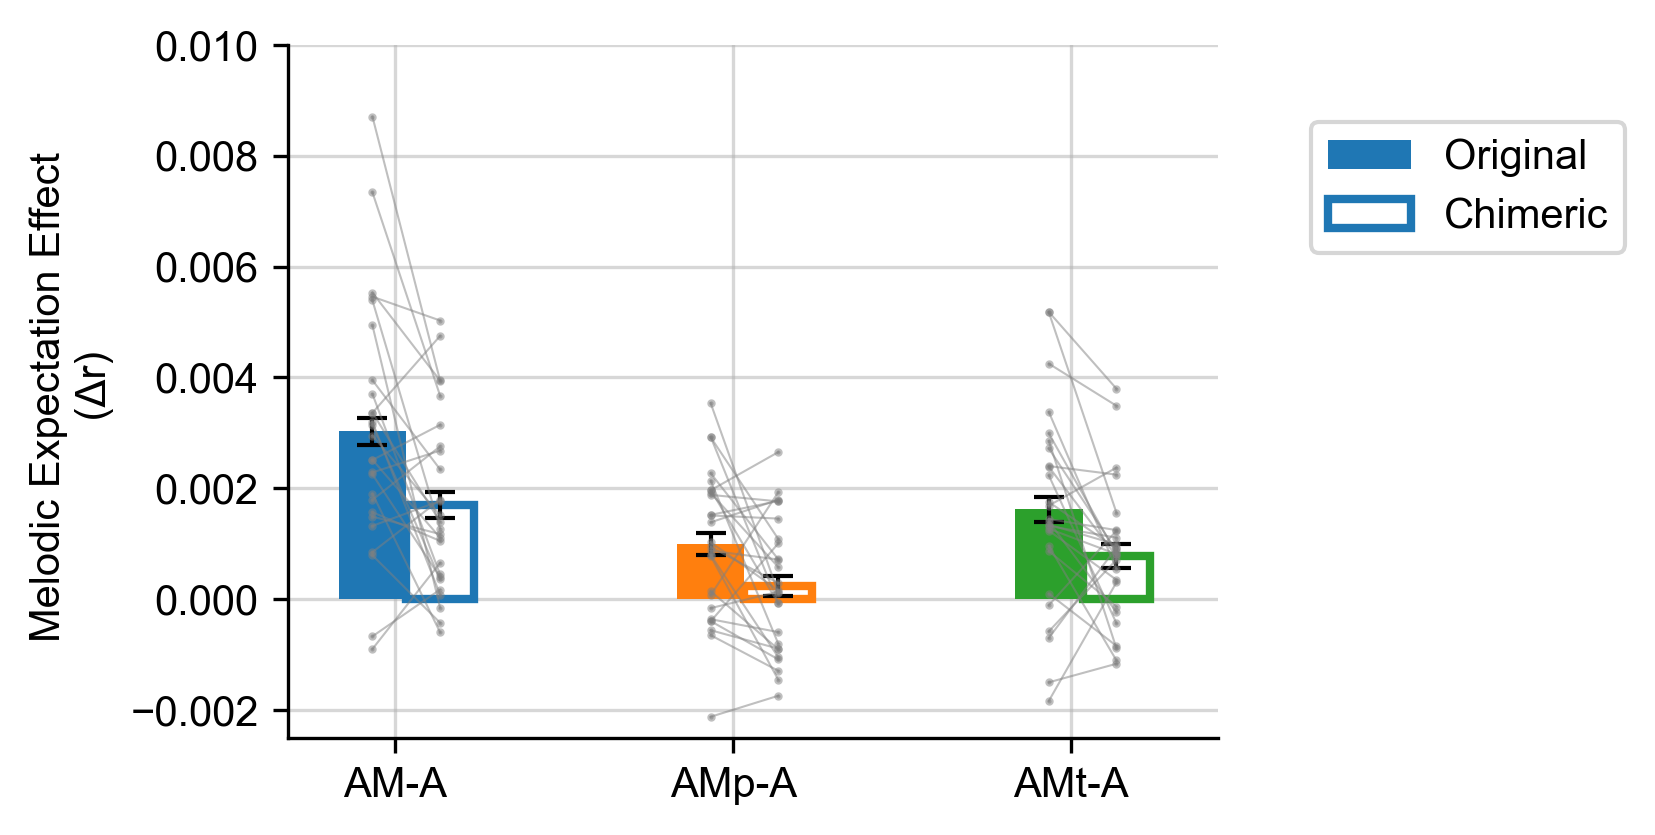

In [21]:
# Plot within model
y=[mean_ori_both.mean(),mean_ori_both_pitch.mean(),mean_ori_both_time.mean(),
   mean_chimera_both.mean(),mean_chimera_both_pitch.mean(),mean_chimera_both_time.mean(),]
yerr = [mean_ori_both.std()/np.sqrt(len(mean_ori_A_group)),mean_ori_both_pitch.std()/np.sqrt(len(mean_ori_A_group)),mean_ori_both_time.std()/np.sqrt(len(mean_ori_A_group)),
        mean_chimera_both.std()/np.sqrt(len(mean_ori_A_group)),mean_chimera_both_pitch.std()/np.sqrt(len(mean_ori_A_group)),mean_chimera_both_time.std()/np.sqrt(len(mean_ori_A_group))]

dpi = 300
plt.rc('axes', titlesize=10, labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rcParams["font.family"] = "Arial"


figure_path = '/Users/tongshan/Documents/MusicExp/paper_figs'

barWidth = 0.2
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]

fig = plt.figure(dpi=dpi)
fig.set_size_inches(4, 3)
plt.bar(br1[0], mean_ori_both.mean(), color='C0', width=barWidth, label='Original',zorder=3)
plt.bar(br1[1], mean_ori_both_pitch.mean(), color='C1', width=barWidth,zorder=3)
plt.bar(br1[2], mean_ori_both_time.mean(), color='C2', width=barWidth,zorder=3)
plt.bar(br2[0], mean_chimera_both.mean(), edgecolor='C0', linewidth=2, fill=False, width=barWidth, label='Chimeric',zorder=3)
plt.bar(br2[1], mean_chimera_both_pitch.mean(), edgecolor='C1', linewidth=2, fill=False, width=barWidth, zorder=3)
plt.bar(br2[2], mean_chimera_both_time.mean(), edgecolor='C2', linewidth=2, fill=False, width=barWidth, zorder=3)

plt.errorbar([br1[0],br1[1],br1[2], br2[0],br2[1],br2[2]], y=y, yerr=yerr,linestyle="", capsize=3.5, color="k",zorder=4,linewidth=1)
#plt.xlabel('Model')
plt.ylabel("Melodic Expectation Effect \n (Δr)")
#plt.ylim(-0, 0.045)
plt.ylim(-0.0025, 0.01)
plt.xlim(-0.25, 2.5)
plt.xticks([r + barWidth/3 for r in range(3)], ['AM-A','AMp-A','AMt-A'])
for si in range(len(subject_list)):
    plt.plot([br1[0],br2[0]],[mean_ori_both_subject[si],mean_chimera_both_subject[si]], ".-", markersize=2, linewidth=0.5, c='grey',zorder=5,alpha=0.5)
    plt.plot([br1[1],br2[1]],[mean_ori_both_pitch_subject[si],mean_chimera_both_pitch_subject[si]], ".-", markersize=2,linewidth=0.5, c='grey',zorder=5,alpha=0.5)
    plt.plot([br1[2],br2[2]],[mean_ori_both_time_subject[si],mean_chimera_both_time_subject[si]], ".-", markersize=2,linewidth=0.5, c='grey',zorder=5,alpha=0.5)


lg = plt.legend(fontsize=10, loc=(1.1,0.7))
plt.grid(alpha=0.5,zorder=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(figure_path+'model_prediction_accuracy_delta_r_subject_pitch-time.svg', dpi=dpi, format='svg', bbox_extra_artists=(lg,), bbox_inches='tight')


In [45]:
delta_r_df_stm = pd.read_csv(exp_path+'expectation_effect_ltm_stm_nb_pitch_ioi_linear_model_zscore_reg_individual_delta_r.csv')

In [46]:
formula = "delta_r ~ C(category,Treatment(reference='original')) + C(model,Treatment(reference='STM')) + C(category, Treatment(reference='original'))*C(model,Treatment(reference='STM')) + musician + musician*C(category, Treatment(reference='original'))"
delta_r_lm = smf.mixedlm(formula, delta_r_df_stm, groups="random_eff").fit()
print(delta_r_lm.summary())

                                                     Mixed Linear Model Regression Results
Model:                                         MixedLM                              Dependent Variable:                              delta_r   
No. Observations:                              6864                                 Method:                                          REML      
No. Groups:                                    858                                  Scale:                                           0.0000    
Min. group size:                               8                                    Log-Likelihood:                                  24829.9706
Max. group size:                               8                                    Converged:                                       Yes       
Mean group size:                               8.0                                                                                             
---------------------------------------------

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [48]:
pairwise_delta_r_stm = pingouin.pairwise_ttests(data=delta_r_df_stm, dv="delta_r", subject="random_eff", within=["model","category"], parametric=True, alpha=0.05, padjust='holm', nan_policy='pairwise')
print(pairwise_delta_r_stm.round(3))
pairwise_delta_r_stm.columns

            Contrast model        A         B Paired Parametric       T  \
0              model     -       AM       LTM   True       True  -2.941   
1              model     -       AM       STM   True       True  17.590   
2              model     -       AM      both   True       True   0.075   
3              model     -      LTM       STM   True       True  13.505   
4              model     -      LTM      both   True       True   3.185   
5              model     -      STM      both   True       True -14.025   
6           category     -  chimera  original   True       True  -4.058   
7   model * category    AM  chimera  original   True       True  -4.429   
8   model * category   LTM  chimera  original   True       True  -2.834   
9   model * category   STM  chimera  original   True       True  -3.279   
10  model * category  both  chimera  original   True       True  -3.445   

      dof alternative  p-unc  p-corr p-adjust       BF10  hedges  
0   857.0   two-sided  0.003   0

/opt/anaconda3/lib/python3.12/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


Index(['Contrast', 'model', 'A', 'B', 'Paired', 'Parametric', 'T', 'dof',
       'alternative', 'p-unc', 'p-corr', 'p-adjust', 'BF10', 'hedges'],
      dtype='object')

# Delta r with `preference`

In [7]:
df = pd.read_csv('/Users/tongshan/Documents/MusicExp/expectation_effect_ltm_stm_both_nb_pitch_ioi_linear_model_zscore_reg_individual_pitch-time.csv')
df["random_eff"] = df["subject"].astype(str) + "+" + df["group"].astype(int).astype(str)

In [28]:
set_group = df.groupby(['random_eff','category','model','musician','prefer'])
mean_set_group = set_group.mean().reset_index()

mean_ori_A_group = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'A')]['random_eff'])
mean_ori_A_musician = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'A')]['musician'])
mean_chimera_A_group = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'A')]['random_eff'])
mean_chimera_A_musician = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'A')]['musician'])


# 计算 original 和 chimera 条件下每个 random_eff 的 mean prefer
mean_ori_A_prefer = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'A')]['prefer'])
mean_chimera_A_prefer = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'A')]['prefer'])


mean_ori_A = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'A')]['r'])
mean_ori_both = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'both')]['r'])
mean_ori_both_pitch = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'both_pitch')]['r'])
mean_ori_both_time = np.array(mean_set_group[(mean_set_group['category'] == 'original') & (mean_set_group['model'] == 'both_time')]['r'])

mean_chimera_A = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'A')]['r'])
mean_chimera_both = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'both')]['r'])
mean_chimera_both_pitch = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'both_pitch')]['r'])
mean_chimera_both_time = np.array(mean_set_group[(mean_set_group['category'] == 'chimera') & (mean_set_group['model'] == 'both_time')]['r'])


delta_r_df = pd.DataFrame(columns=["model","category","delta_r","random_eff","musician","prefer"])

delta_r_df = pd.concat([delta_r_df, pd.DataFrame({"model":np.array(["both"]*len(mean_ori_A_group)),
                                                  "category":["original"]*len(mean_ori_A_group),
                                                  "random_eff":list(mean_ori_A_group),
                                                  "musician":list(mean_ori_A_musician),
                                                  "prefer":list(mean_ori_A_prefer),
                                                  "delta_r":list(mean_ori_both-mean_ori_A)})])
delta_r_df = pd.concat([delta_r_df, pd.DataFrame({"model":np.array(["both_pitch"]*len(mean_ori_A_group)),
                                                  "category":["original"]*len(mean_ori_A_group),
                                                  "random_eff":list(mean_ori_A_group),
                                                  "musician":list(mean_ori_A_musician),
                                                  "prefer":list(mean_ori_A_prefer),
                                                  "delta_r":list(mean_ori_both_pitch-mean_ori_A)})])
delta_r_df = pd.concat([delta_r_df, pd.DataFrame({"model":np.array(["both_time"]*len(mean_ori_A_group)),
                                                  "category":["original"]*len(mean_ori_A_group),
                                                  "random_eff":list(mean_ori_A_group),
                                                  "musician":list(mean_ori_A_musician),
                                                  "prefer":list(mean_ori_A_prefer),
                                                  "delta_r":list(mean_ori_both_time-mean_ori_A)})])

delta_r_df = pd.concat([delta_r_df, pd.DataFrame({"model":np.array(["both"]*len(mean_chimera_A_group)),
                                                  "category":["chimera"]*len(mean_chimera_A_group),
                                                  "random_eff":list(mean_chimera_A_group),
                                                  "musician":list(mean_chimera_A_musician),
                                                  "prefer":list(mean_chimera_A_prefer),
                                                  "delta_r":list(mean_chimera_both-mean_chimera_A)})])
delta_r_df = pd.concat([delta_r_df, pd.DataFrame({"model":np.array(["both_pitch"]*len(mean_chimera_A_group)),
                                                  "category":["chimera"]*len(mean_chimera_A_group),
                                                  "random_eff":list(mean_chimera_A_group),
                                                  "musician":list(mean_chimera_A_musician),
                                                  "prefer":list(mean_chimera_A_prefer),
                                                  "delta_r":list(mean_chimera_both_pitch-mean_chimera_A)})])
delta_r_df = pd.concat([delta_r_df, pd.DataFrame({"model":np.array(["both_time"]*len(mean_chimera_A_group)),
                                                  "category":["chimera"]*len(mean_chimera_A_group),
                                                  "random_eff":list(mean_chimera_A_group),
                                                  "musician":list(mean_chimera_A_musician),
                                                  "prefer":list(mean_chimera_A_prefer),
                                                  "delta_r":list(mean_chimera_both_time-mean_chimera_A)})])

delta_r_df['subject'] = delta_r_df['random_eff'].str.split("+", expand=True)[0].astype(str)


#delta_r_df.to_csv(exp_path+'expectation_effect_ltm_stm_nb_pitch_ioi_linear_model_zscore_reg_individual_delta_r_pitch-time.csv')

/var/folders/0w/f8xqj5c94mn10yt1h51zr99r0000gp/T/ipykernel_39915/4228304115.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  delta_r_df = pd.concat([delta_r_df, pd.DataFrame({"model":np.array(["both"]*len(mean_ori_A_group)),


In [33]:
formula = "delta_r ~ C(category,Treatment(reference='original')) + C(model,Treatment(reference='both')) + C(category, Treatment(reference='original'))*C(model,Treatment(reference='both')) + musician + prefer + musician*C(category, Treatment(reference='original')) + C(category, Treatment(reference='original'))*prefer"
delta_r_lm = smf.mixedlm(formula, delta_r_df, groups="random_eff").fit()
print(delta_r_lm.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood opti

                                                        Mixed Linear Model Regression Results
Model:                                            MixedLM                                Dependent Variable:                                delta_r   
No. Observations:                                 8826                                   Method:                                            REML      
No. Groups:                                       858                                    Scale:                                             0.0001    
Min. group size:                                  6                                      Log-Likelihood:                                    29568.5845
Max. group size:                                  12                                     Converged:                                         No        
Mean group size:                                  10.3                                                                                                


# Fifure 4 Correlation do large familty-wise correction

In [36]:
exp_path = '/Volumes/TOSHIBA EXT/Chimera/'

In [38]:
channel_names = ['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9',
                 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8',
                 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2',
                  'F4', 'F8', 'Fp2']

In [37]:
subject_list = ['chimera_001','chimera_002', 'chimera_003','chimera_004',
                'chimera_005','chimera_006','chimera_007','chimera_008',
                'chimera_009','chimera_010','chimera_011', 'chimera_012',
                'chimera_013','chimera_014','chimera_015','chimera_016',
                'chimera_017','chimera_018','chimera_019','chimera_020',
                'chimera_021', 'chimera_022','chimera_023','chimera_024',
                'chimera_025','chimera_pilot_1_64chn','chimera_pilot_2_64chn']

subject_num = len(subject_list)
# Load data
trf_ori_all = np.zeros((subject_num,2,102,32))
trf_chimera_all = np.zeros((subject_num,4,102,32))

for i, subject in enumerate(subject_list):
    data_root = exp_path+'subject'+subject[7:] # EEG-BIDS root path
    trf_data = read_hdf5(data_root+'/'+subject+'_32chn_eeg_125hz_hp1_lp8_ICA_trf_data_-01_07_downbeat_reg0.hdf5')
    trf_ori_all[i] = trf_data['ori_weights']
    trf_chimera_all[i] = trf_data['chimera_weights']
    lag = trf_data['time']*1000

trf_chimera_downbeat_3 = np.sum(trf_chimera_all[:,1:4,:,:],axis=1,keepdims=True)
trf_chimera_downbeat_2 = np.sum(trf_chimera_all[:,1:3,:,:],axis=1,keepdims=True)
trf_chimera_all = np.concatenate((trf_chimera_all, trf_chimera_downbeat_3, trf_chimera_downbeat_2), axis=1)

trf_ori_all_ave = np.average(trf_ori_all, axis=0)
trf_ori_all_err = np.std(trf_ori_all, axis=0)/np.sqrt(subject_num)
trf_chimera_all_ave = np.average(trf_chimera_all, axis=0)

In [39]:
from statsmodels.stats import multitest

subject_index = np.arange(0,27,1)
formal_training_years = [4,10,1.5,5,1.5,0,3,1,2,10,5,2,7,7,0,0,1,11,5,10,0,2,10,5,2,6,2]

### Original P1

In [ ]:
# Original onset amplitude
# P1
ori_onset_amplitude_p1_all = []
r_val_p1 = []
p_val_p1 = []
for chn in range(len(channel_names)):
    ori_onset_amplitude_p1 = []
    for si in subject_index:
        y = max([trf_ori_all[si,0,i,chn] for i in np.arange(16,29)])
        ori_onset_amplitude_p1 += [y]
    ori_onset_amplitude_p1_all += [ori_onset_amplitude_p1]
    r, p = stats.pearsonr(formal_training_years, ori_onset_amplitude_p1)
    r_val_p1 += [r]
    p_val_p1 += [p]

_, p_corr_p1 = multitest.fdrcorrection(p_val_p1, method='i')
#chn_sig = p_corr <0.05


NameError: name 'p_corr' is not defined

### Original P2

In [42]:
# P2
ori_onset_amplitude_p2_all = []
r_val_p2 = []
p_val_p2 = []

for chn in range(len(channel_names)):
    ori_onset_amplitude_p2 = []
    for si in subject_index:
        y = max([trf_ori_all[si,0,i,chn] for i in np.arange(28,47)])
        ori_onset_amplitude_p2 += [y]
    ori_onset_amplitude_p2_all += [ori_onset_amplitude_p2]
    r, p = stats.pearsonr(formal_training_years, ori_onset_amplitude_p2)
    r_val_p2 += [r]
    p_val_p2 += [p]
    
_, p_corr_p2 = multitest.fdrcorrection(p_val_p2, method='i')

#chn_sig = p_corr <0.05

In [ ]:
# Plot topomap of R values
fig,ax1 = plt.subplots(1)
fig.set_size_inches(3,3)
mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=6)
im, cm = mne.viz.plot_topomap(np.array(r_val), pos=info, axes=ax1, vlim=(-0.6, 0.6), 
                              image_interp="nearest", mask=chn_sig, contours=0,
                              mask_params=mask_params)
fig.suptitle("Original Note onset P2", fontsize=10)
plt.savefig(figure_path+"Original_onset_P2amp_musicianship_corr.svg",dpi=dpi,format='svg', bbox_inches='tight')

### Original DBo

In [43]:
# Original downbeat amplitude
r_val_db = []
p_val_db = []
ori_db_amplitude_all = []
for chn in range(len(channel_names)):
    ori_db_amplitude = []
    for si in subject_index:
        y = max([trf_ori_all[si,1,i,chn] for i in np.arange(25,64)])
        ori_db_amplitude += [y]
    ori_db_amplitude_all += [ori_db_amplitude]
    r, p = stats.pearsonr(formal_training_years, ori_db_amplitude)
    r_val_db += [r]
    p_val_db += [p]

_, p_corr_db = multitest.fdrcorrection(p_val_db, method='i')
#chn_sig = p_corr <0.05

In [ ]:
# Plot topomap of R values
fig,ax1 = plt.subplots(1)
fig.set_size_inches(3,3)
mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=6)
im, cm = mne.viz.plot_topomap(np.array(r_val), pos=info, axes=ax1, vlim=(-0.6, 0.6), 
                              image_interp="nearest", mask=chn_sig, contours=0,
                              mask_params=mask_params)
fig.suptitle("Original Downbeat peak", fontsize=10)
plt.savefig(figure_path+"Original_downbeat_musicianship_corr.svg",dpi=dpi,format='svg', bbox_inches='tight')


### Multitest for all p_values

In [62]:
# Combine p_val_p1, p_val_p2, and p_val_db, perform multiple comparison correction, and return the indices and original p-values where the corrected p-value < 0.05

# Assume p_val_p1, p_val_p2, p_val_db have been calculated earlier
# If variable names are different, please adjust accordingly

# Combine all p-values
all_p_vals = p_val_p1 + p_val_p2 + p_val_db

# Multiple comparison correction
_, all_p_corr = multitest.fdrcorrection(all_p_vals, method='n')

# Find indices where corrected p-value < 0.05
significant_indices = [i for i, p in enumerate(all_p_corr) if p < 0.05]

# Print significant original and corrected p-values
print("Significant results after multiple comparison correction (p<0.05):")
for idx in significant_indices:
    print(f"Index: {idx}, original p-value: {all_p_vals[idx]:.4g}, corrected p-value: {all_p_corr[idx]:.4g}")

# For each significant result, determine which original p-value set (p_val_p1, p_val_p2, p_val_db) it belongs to
set_lengths = [len(p_val_p1), len(p_val_p2), len(p_val_db)]
set_names = ['p_val_p1', 'p_val_p2', 'p_val_db']

print("\nSignificant results and their corresponding original p-value set:")
for idx in significant_indices:
    # Determine which set it belongs to
    if idx < set_lengths[0]:
        set_name = set_names[0]
        set_idx = idx
    elif idx < set_lengths[0] + set_lengths[1]:
        set_name = set_names[1]
        set_idx = idx - set_lengths[0]
    else:
        set_name = set_names[2]
        set_idx = idx - set_lengths[0] - set_lengths[1]
    print(f"Index: {idx}, belongs to {set_name}, index in set: {set_idx}, original p-value: {all_p_vals[idx]:.4g}, corrected p-value: {all_p_corr[idx]:.4g}")

    # 将校正后的 p 值分配回各自的原始集合，并命名为 p_val_p1_corr, p_val_p2_corr, p_val_db_corr

    # 先初始化校正后的 p 值列表
    p_val_p1_corr = [None] * len(p_val_p1)
    p_val_p2_corr = [None] * len(p_val_p2)
    p_val_db_corr = [None] * len(p_val_db)

    # 依次分配校正后的 p 值
    for idx, p_corr in enumerate(all_p_corr):
        if idx < set_lengths[0]:
            p_val_p1_corr[idx] = p_corr
        elif idx < set_lengths[0] + set_lengths[1]:
            p_val_p2_corr[idx - set_lengths[0]] = p_corr
        else:
            p_val_db_corr[idx - set_lengths[0] - set_lengths[1]] = p_corr

    # 可选：打印校正后的 p 值列表以检查
    print("\np_val_p1_corr:", p_val_p1_corr)
    print("p_val_p2_corr:", p_val_p2_corr)
    print("p_val_db_corr:", p_val_db_corr)


Significant results after multiple comparison correction (p<0.05):

Significant results and their corresponding original p-value set:


In [48]:
montage = mne.channels.make_standard_montage("easycap-M1")
info = mne.create_info(channel_names, sfreq=125,ch_types='eeg')
info.set_montage(montage)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 125.0 Hz
>

In [57]:
figure_path = '/Users/tongshan/Documents/MusicExp/paper_figs/'

In [54]:
#%% FIG SETTING
dpi = 300
plt.rc('axes', titlesize=10, labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rcParams["font.family"] = "Arial"

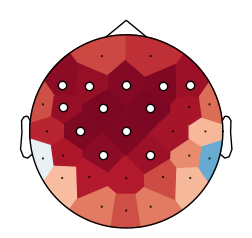

In [60]:
chn_sig = np.array(p_val_p2_corr) < 0.05

# Plot topomap of R values for p2
fig, ax1 = plt.subplots(1)
fig.set_size_inches(3,3)
mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=6)
im, cm = mne.viz.plot_topomap(np.array(r_val_p2), pos=info, axes=ax1, vlim=(-0.6, 0.6), 
                              image_interp="nearest", mask=chn_sig, contours=0,
                              mask_params=mask_params)
fig.suptitle("Original Note onset P2", fontsize=10)
fig.savefig(figure_path + "Original_onset_P2amp_musicianship_corr.svg", dpi=300, format='svg', bbox_inches='tight')
#plt.savefig(figure_path+"Original_onset_P2amp_musicianship_corr.svg",dpi=300,format='svg', bbox_inches='tight')